In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon_laptop_prices.csv')

In [3]:
df.shape

(4446, 14)

In [4]:
df.sample(5)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
2701,Dell,XPS9365-7086SLV-PUS,13.3 Inches,Silver,256 GB,Core i7,16 GB,Windows 10 Home,"Backlit Keyboard,Fingerprint Reader",Integrated,NaN,NaN,3.1,"$1,299.99"
2721,HP,NaN,15.6 Inches,Black,1000 GB,Pentium N5000,16 GB,Windows 11,NaN,Integrated,Intel,1.1 GHz,4.4,$459.99
426,Dell,Latitude 5000,15.6 Inches,Gray,256 GB,Core i5,16 GB,Windows 10 Pro,Anti-glare Screen,Iris Xe Graphics,NaN,NaN,NaN,"$1,169.99"
388,ASUS,Chromebook Detachable CM3,10.5 Inches,Mineral Gray,65 GB,MediaTek MT8183,4 GB,Chrome OS,Stylus,Integrated,NaN,NaN,4.1,$349.95
2437,Dell,Latitude 5430 Laptop,14 Inches,Black,256 GB,Core i5,16 GB,Windows 11 Pro,NaN,Integrated,Intel Integrated Graphics,NaN,NaN,$956.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [6]:
df.describe()

,rating
count,2174.000000
mean,4.086891
std,1.165337
min,1.000000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


In [7]:
df.columns

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed', 'rating', 'price'],
      dtype='object')

In [8]:
df.duplicated().sum()

1818

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(2628, 14)

In [11]:
df.isnull().sum()

brand                      0
model                    131
screen_size               28
color                    558
harddisk                 180
cpu                       99
ram                       58
OS                        26
special_features         907
graphics                  62
graphics_coprocessor    1588
cpu_speed               2298
rating                  1587
price                      5
dtype: int64

In [12]:
cat_cols=df.select_dtypes(include='object').columns

In [13]:
cat_cols

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed', 'price'],
      dtype='object')

In [14]:
num_cols=df.select_dtypes(exclude='object').columns

In [15]:
num_cols

Index(['rating'], dtype='object')

In [16]:
cat_cols

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed', 'price'],
      dtype='object')

**price**

In [17]:
df['price'].unique()

array(['$589.99 ', '$999.99 ', '$1,599.00 ', ..., '$591.99 ',
       '$1,771.99 ', '$938.99 '], dtype=object)

In [18]:
df['price']=df['price'].str.replace("$",'',regex=True)

In [19]:
df['price'].unique()

array(['589.99 ', '999.99 ', '1,599.00 ', ..., '591.99 ', '1,771.99 ',
       '938.99 '], dtype=object)

In [20]:
df['price']=df['price'].str.replace(",",'')

In [21]:
df['price'].unique()

array(['589.99 ', '999.99 ', '1599.00 ', ..., '591.99 ', '1771.99 ',
       '938.99 '], dtype=object)

In [22]:
def usd_to_rupees(usd):
    return float(usd)*83.25

df['price']=df['price'].apply(usd_to_rupees)

In [23]:
df['price'].unique()

array([ 49116.6675,  83249.1675, 133116.75  , ...,  49283.1675,
       147518.1675,  78170.9175])

In [24]:
df['price'].dtype

dtype('float64')

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\3826285860.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


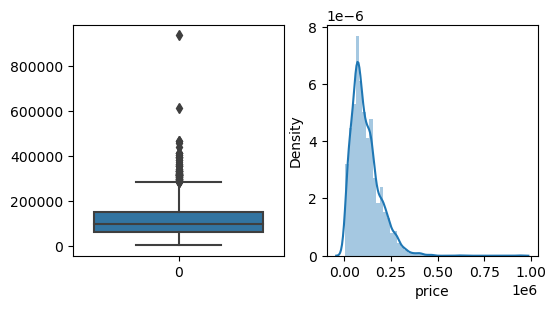

In [25]:
fig = plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
sns.boxplot(df['price'])

plt.subplot(1,2,2)
sns.distplot(df['price'])
plt.show()

In [26]:
df['price'].skew()

1.5813127118227488

In [27]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [28]:
df[(df['price']>ul) | (df['price']<ll)].head(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
54,ASUS,ROG Strix SCAR 18,18 Inches,Black,2 TB,Intel Core i9,32 GB,Windows 11 Pro,Anti Glare Coating,Dedicated,NaN,NaN,4.3,324591.7500
89,Microsoft,Surface Laptop Studio 2,14.4 Inches,Platinum,2 TB,Core i7-13700K,64 GB,Windows 11 Home,Portable,NVIDIA® GeForce RTX™ 4060,NaN,NaN,NaN,308024.1675


In [29]:
df['price']=np.where(
    df['price']>ul,
    ul,
    np.where(
        df['price']<ll,
        ll,
        df['price']
    )
)

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\2653851138.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


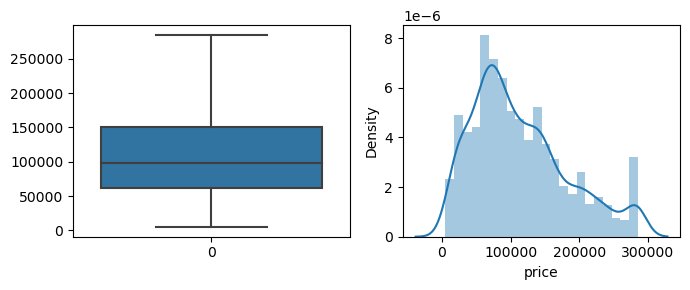

In [30]:
fig = plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.boxplot(df['price'])

plt.subplot(1,2,2)
sns.distplot(df['price'])

plt.tight_layout()
plt.show()

**screen_size**

In [31]:
df['screen_size'].unique()

array(['14 Inches', '15.6 Inches', '15.66 Inches', '13.3 Inches',
       '15.3 Inches', '16 Inches', '17.3 Inches', '11.6 Inches',
       '15 Inches', '13.4 Inches', '18 Inches', '17 Inches',
       '16.2 Inches', '13.6 Inches', '14.4 Inches', '13 Inches',
       '14.5 Inches', '12.45 Inches', '12.2 Inches', '13.5 Inches',
       '13.1 Inches', '12 Inches', nan, '10.5 Inches', '12.3 Inches',
       '10.1 Inches', '13.9 Inches', '14.1 Inches', '11 Inches',
       '12.4 Inches', '15.4 Inches', '12.5 Inches', '16.1 Inches',
       '22 Inches', '27 Inches', '10 Inches'], dtype=object)

In [32]:
df['screen_size']=df['screen_size'].str.split().str[0]

In [33]:
df['screen_size'].unique()

array(['14', '15.6', '15.66', '13.3', '15.3', '16', '17.3', '11.6', '15',
       '13.4', '18', '17', '16.2', '13.6', '14.4', '13', '14.5', '12.45',
       '12.2', '13.5', '13.1', '12', nan, '10.5', '12.3', '10.1', '13.9',
       '14.1', '11', '12.4', '15.4', '12.5', '16.1', '22', '27', '10'],
      dtype=object)

In [34]:
df['screen_size']=df['screen_size'].astype(float)

In [35]:
df['screen_size'].dtype

dtype('float64')

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\1478703700.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['screen_size'])


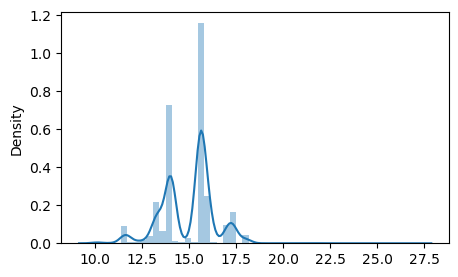

In [36]:
fig = plt.figure(figsize=(5,3))
sns.distplot(x=df['screen_size'])
plt.show()

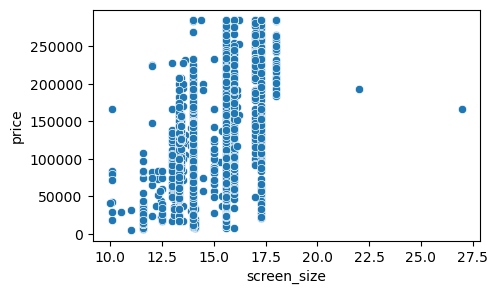

In [37]:
fig = plt.figure(figsize=(5,3))
sns.scatterplot(x=df['screen_size'] , y=df['price'])
plt.show()

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\4056677743.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['screen_size'])


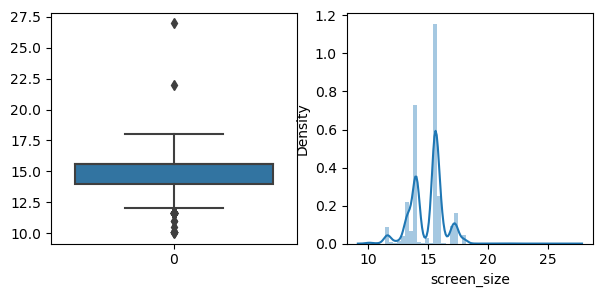

In [38]:
fig = plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.boxplot(df['screen_size'])

plt.subplot(1,2,2)
sns.distplot(df['screen_size'])
plt.show()

In [39]:
df['screen_size'].skew()

-0.08040093113214099

In [40]:
q1 = df['screen_size'].quantile(0.25)
q3 = df['screen_size'].quantile(0.75)
iqr = q3 - q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [41]:
df[(df['screen_size']>ul) | (df['screen_size']<ll)].head(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
17,Gateway,NaN,11.6,Blue,64 GB,Celeron N4020,4 GB,Windows 10 S,NaN,Integrated,Intel,1.1 GHz,4.0,12903.750
62,Lenovo,Chromebook,11.6,Black,32 GB,MediaTek MT8183,4 GB,Chrome OS,Anti-glare,Integrated,NaN,NaN,4.3,9552.105


In [42]:
df['screen_size']=np.where(
    df['screen_size']>ul,
    ul,
    np.where(
        df['screen_size']<ll,
        ll,
        df['screen_size']
    )
)

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\4056677743.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['screen_size'])


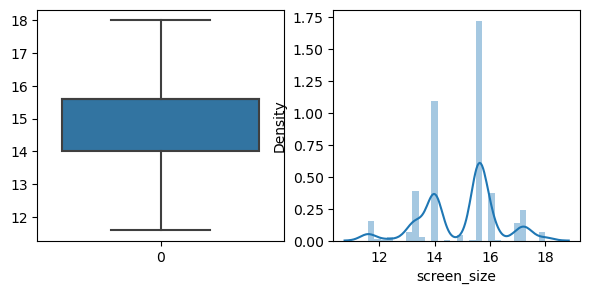

In [43]:
fig = plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.boxplot(df['screen_size'])

plt.subplot(1,2,2)
sns.distplot(df['screen_size'])
plt.show()

In [44]:
df.corr()['price']

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


screen_size    0.465102
rating        -0.032321
price          1.000000
Name: price, dtype: float64

**harddisk**

In [45]:
df['harddisk'].unique()

array(['1000 GB', nan, '256 GB', '128 GB', '64 GB', '512 GB', '1 TB',
       '1152 GB', '64', '2 TB', '32 GB', '16 GB', '4 TB', '240 GB',
       '65 GB', '120 GB', '1024 GB', '300 GB', '320 GB', '2000 GB',
       '480 GB', '32 MB', '500 GB', '512', '128 MB', '250 GB', '160 GB',
       '64 MB', '8 GB', '8 TB', '4000 GB', '1256 GB', '1512 GB',
       '1.92 TB', '1.5 TB', '512 MB', '640 GB', '2048 GB', '256',
       '8000 GB', '6000 GB', '3 TB'], dtype=object)

In [46]:
df['harddisk']=df['harddisk'].str.replace('GB','')

In [47]:
df['harddisk'].unique()

array(['1000 ', nan, '256 ', '128 ', '64 ', '512 ', '1 TB', '1152 ', '64',
       '2 TB', '32 ', '16 ', '4 TB', '240 ', '65 ', '120 ', '1024 ',
       '300 ', '320 ', '2000 ', '480 ', '32 MB', '500 ', '512', '128 MB',
       '250 ', '160 ', '64 MB', '8 ', '8 TB', '4000 ', '1256 ', '1512 ',
       '1.92 TB', '1.5 TB', '512 MB', '640 ', '2048 ', '256', '8000 ',
       '6000 ', '3 TB'], dtype=object)

In [48]:
df['harddisk']=df['harddisk'].astype(str)

In [49]:
def convert_to_gb(data):
    if 'TB' in data:
        return float(data.split()[0])*1000
    elif 'MB' in data:
        return float(data.split()[0])/1000
    else:
        return data.rstrip()
       
df['harddisk']=df['harddisk'].apply(convert_to_gb)

In [50]:
df['harddisk'].unique()

array(['1000', 'nan', '256', '128', '64', '512', 1000.0, '1152', 2000.0,
       '32', '16', 4000.0, '240', '65', '120', '1024', '300', '320',
       '2000', '480', 0.032, '500', 0.128, '250', '160', 0.064, '8',
       8000.0, '4000', '1256', '1512', 1920.0, 1500.0, 0.512, '640',
       '2048', '8000', '6000', 3000.0], dtype=object)

In [51]:
df['harddisk']=df['harddisk'].astype(float)

In [52]:
df.corr()['price']

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


screen_size    0.465102
harddisk       0.401156
rating        -0.032321
price          1.000000
Name: price, dtype: float64

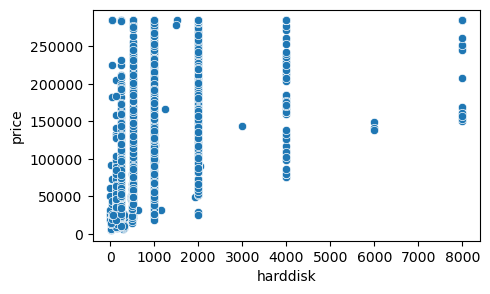

In [53]:
fig = plt.figure(figsize=(5,3))
sns.scatterplot(x=df['harddisk'] , y=df['price'])
plt.show()

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\2788284307.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['harddisk'])


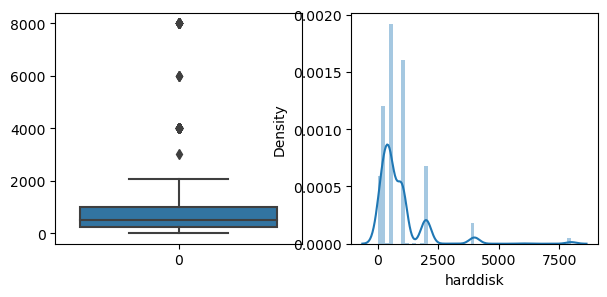

<Figure size 640x480 with 0 Axes>

In [54]:
fig = plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.boxplot(df['harddisk'])

plt.subplot(1,2,2)
sns.distplot(df['harddisk'])

plt.show()
plt.tight_layout()

In [55]:
Q1 = df['harddisk'].quantile(0.25)
Q3 = df['harddisk'].quantile(0.75)
IQR = Q3 - Q1

UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [56]:
df[(df['harddisk']>UL) | (df['harddisk']<LL)].head(1)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
296,Lenovo,Slim 7 82VB,16.0,Storm Grey,4000.0,Core i7 Family,32 GB,Windows 11 Pro,"HD Audio, Backlit Keyboard, Memory Card Slot, ...",Dedicated,NaN,NaN,NaN,162254.25


In [57]:
df['harddisk']=np.where(
    df['harddisk']>UL,
    UL,
    np.where(
        df['harddisk']<LL,
        LL,
        df['harddisk']
    )
)

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\1444369559.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['harddisk'])


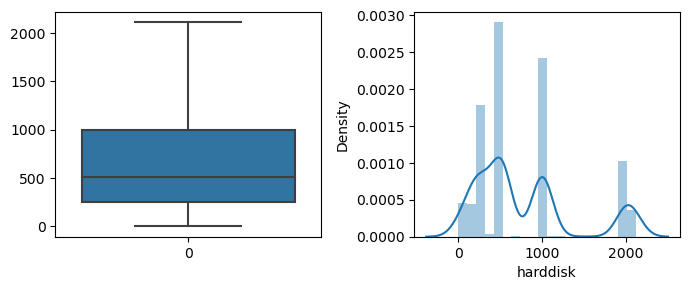

In [58]:
fig = plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.boxplot(df['harddisk'])

plt.subplot(1,2,2)
sns.distplot(df['harddisk'])
plt.tight_layout()
plt.show()

**ram**

In [59]:
df['ram'].unique()

array(['8 GB', '64 GB', '32 GB', '4 GB', '16 GB', '20 GB', nan, '12 GB',
       '40 GB', '96 GB', '6 GB', '1 GB', '2 GB', '48 GB', '24 GB',
       '64 MB', '5 GB', '128 GB', '31.99 GB'], dtype=object)

In [60]:
df['ram']=df['ram'].str.split().str[0]

In [61]:
df['ram']=df['ram'].astype(float)

In [62]:
df['ram'].unique()

array([  8.  ,  64.  ,  32.  ,   4.  ,  16.  ,  20.  ,    nan,  12.  ,
        40.  ,  96.  ,   6.  ,   1.  ,   2.  ,  48.  ,  24.  ,   5.  ,
       128.  ,  31.99])

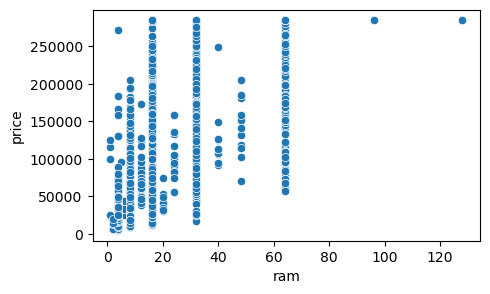

In [63]:
fig = plt.figure(figsize=(5,3))
sns.scatterplot(x=df['ram'] , y=df['price'])
plt.show()

In [64]:
df.corr()['price']

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


screen_size    0.465102
harddisk       0.461649
ram            0.570501
rating        -0.032321
price          1.000000
Name: price, dtype: float64

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\253310254.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ram'])


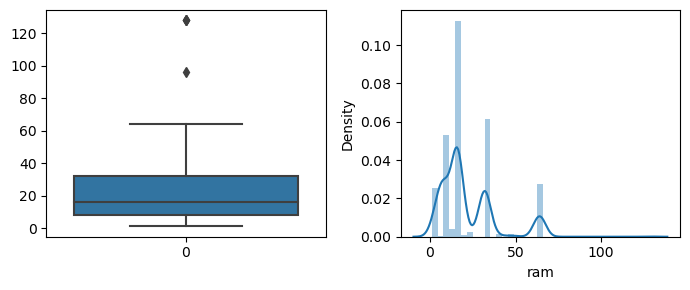

In [65]:
fig = plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.boxplot(df['ram'])

plt.subplot(1,2,2)
sns.distplot(df['ram'])

plt.tight_layout()
plt.show()

In [66]:
Q1 = df['ram'].quantile(0.25)
Q3 = df['ram'].quantile(0.75)
IQR = Q3 - Q1

UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [67]:
df[(df['ram']>UL) | (df['ram']<LL)].head(1)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
373,Apple,NaN,NaN,NaN,2116.0,NaN,96.0,macOS 10.14 Mojave,NaN,Integrated,NaN,NaN,NaN,285053.41125


In [68]:
df['ram']=np.where(
    df['ram']>UL,
    UL,
    np.where(
        df['ram']<LL,
        LL,
        df['ram']
    )
)

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\253310254.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ram'])


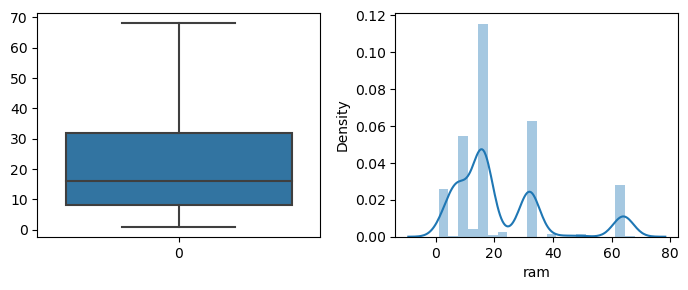

In [69]:
fig = plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.boxplot(df['ram'])

plt.subplot(1,2,2)
sns.distplot(df['ram'])

plt.tight_layout()
plt.show()

**cpu_speed**

In [70]:
df['cpu_speed'].unique()

array(['1.2 GHz', nan, '1.8 GHz', '1.1 GHz', '5.6 GHz', '2.1 GHz',
       '2.6 GHz', '3.4 GHz', '3.4', '4.5 GHz', '2.2 GHz', '2.4 GHz',
       '5 GHz', '3 GHz', '4.7 GHz', '2.8 GHz', '1.3 GHz', '3.7 GHz',
       '2.3 GHz', '5.1 GHz', '4.4 GHz', '1.7 GHz', '5.2 GHz', '2 GHz',
       '3.6 GHz', '4.3 GHz', '2.66 GHz', '3.5 GHz', '4.1 GHz', '4 GHz',
       '3.49 GHz', '2.9 GHz', '1.6 GHz', '2.6', '3.3', '2.5 GHz',
       '4.8 GHz', '1 GHz', '4.2 GHz', '3.2 GHz', '2.4', '1.5 GHz',
       '2.53 GHz', '2.7 GHz', '2 Hz', '3.3 GHz', '3.8 GHz', '1.4 GHz',
       '4.6 GHz', '3.9 GHz', '1.9 GHz', '9120 GHz', '1.8', '4.7',
       '2133 MHz', '2.2, 3.9 GHz', '3200 Hz', '2.5, 3.1 GHz', '1.9',
       '3.1 GHz', '0.9 GHz'], dtype=object)

In [71]:
df['cpu_speed']=df['cpu_speed'].str.replace("GHz",'').str.rstrip()

In [72]:
df['cpu_speed'].unique()

array(['1.2', nan, '1.8', '1.1', '5.6', '2.1', '2.6', '3.4', '4.5', '2.2',
       '2.4', '5', '3', '4.7', '2.8', '1.3', '3.7', '2.3', '5.1', '4.4',
       '1.7', '5.2', '2', '3.6', '4.3', '2.66', '3.5', '4.1', '4', '3.49',
       '2.9', '1.6', '3.3', '2.5', '4.8', '1', '4.2', '3.2', '1.5',
       '2.53', '2.7', '2 Hz', '3.8', '1.4', '4.6', '3.9', '1.9', '9120',
       '2133 MHz', '2.2, 3.9', '3200 Hz', '2.5, 3.1', '3.1', '0.9'],
      dtype=object)

In [73]:
df['cpu_speed']=df['cpu_speed'].str.replace("2.2, 3.9",'3.05').str.rstrip()

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\3548041288.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cpu_speed']=df['cpu_speed'].str.replace("2.2, 3.9",'3.05').str.rstrip()


In [74]:
df['cpu_speed']=df['cpu_speed'].str.replace("2.5, 3.1",'2.8').str.rstrip()

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\771581980.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cpu_speed']=df['cpu_speed'].str.replace("2.5, 3.1",'2.8').str.rstrip()


In [75]:
df['cpu_speed'].unique()

array(['1.2', nan, '1.8', '1.1', '5.6', '2.1', '2.6', '3.4', '4.5', '2.2',
       '2.4', '5', '3', '4.7', '2.8', '1.3', '3.7', '2.3', '5.1', '4.4',
       '1.7', '5.2', '2', '3.6', '4.3', '2.66', '3.5', '4.1', '4', '3.49',
       '2.9', '1.6', '3.3', '2.5', '4.8', '1', '4.2', '3.2', '1.5',
       '2.53', '2.7', '2 Hz', '3.8', '1.4', '4.6', '3.9', '1.9', '9120',
       '2133 MHz', '3.05', '3200 Hz', '3.1', '0.9'], dtype=object)

In [76]:
def convert_to_ghz(value):
    if pd.notna(value):
        if 'Hz' in value:
            return float(value.split()[0]) / 1000000000
        elif 'MHz' in value:
            return float(value.split()[0]) / 1000
    return value

df['cpu_speed'] = df['cpu_speed'].apply(convert_to_ghz)


In [77]:
df['cpu_speed'].unique()

array(['1.2', nan, '1.8', '1.1', '5.6', '2.1', '2.6', '3.4', '4.5', '2.2',
       '2.4', '5', '3', '4.7', '2.8', '1.3', '3.7', '2.3', '5.1', '4.4',
       '1.7', '5.2', '2', '3.6', '4.3', '2.66', '3.5', '4.1', '4', '3.49',
       '2.9', '1.6', '3.3', '2.5', '4.8', '1', '4.2', '3.2', '1.5',
       '2.53', '2.7', 2e-09, '3.8', '1.4', '4.6', '3.9', '1.9', '9120',
       2.133e-06, '3.05', 3.2e-06, '3.1', '0.9'], dtype=object)

In [78]:
df['cpu_speed']=df['cpu_speed'].astype(float)

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\3039867645.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.1,6,0.2)


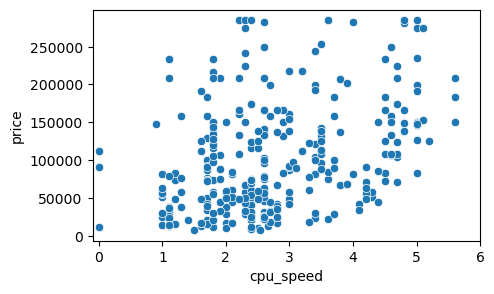

In [79]:
fig = plt.figure(figsize=(5,3))
sns.scatterplot(x=df['cpu_speed'] , y=df['price'])
plt.xlim(-0.1,6,0.2)
plt.show()

In [80]:
df.corr()['price']

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


screen_size    0.465102
harddisk       0.461649
ram            0.570758
cpu_speed     -0.062234
rating        -0.032321
price          1.000000
Name: price, dtype: float64

In [81]:
df.sample(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
3206,Dell,Latitude 5530 Laptop,15.6,Black,2000.0,Core i7,32.0,Windows 11 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,212151.8025
4297,HP,Envy 17T-CH100,17.3,Natural Silver,1000.0,Core i7 Family,32.0,Windows 10 Pro,"Fingerprint Reader, HD Audio, Backlit Keyboard...",Integrated,NaN,NaN,NaN,115634.2500


**rating**

In [82]:
df['rating'].unique()

array([nan, 4.5, 5. , 4.8, 4.7, 4.4, 4.3, 4.2, 4. , 4.6, 1. , 3.8, 4.1,
       3.7, 3.9, 3.5, 3. , 2.5, 2.8, 2.9, 3.4, 3.6, 3.3, 2.6, 4.9, 2.3,
       2. , 3.1, 1.7, 2.7, 2.1, 3.2, 2.2])

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\2666379004.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['rating'])


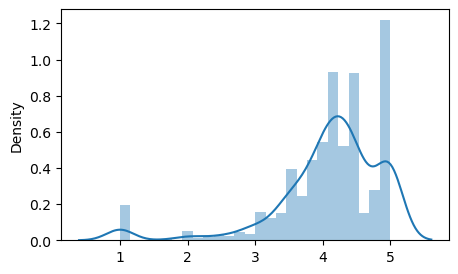

In [83]:
fig = plt.figure(figsize=(5,3))
sns.distplot(x=df['rating'])
plt.show()

In [84]:
df.sample(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
881,ASUS,E410MA-TB.CL464,14.0,NaN,64.0,Celeron,4.0,Windows 11 S,NaN,Integrated,Intel UHD Graphics 600,1.1,4.6,19146.6675
4030,Dell,Inspiron 3511 Laptop,15.6,Black,500.0,Core i5,8.0,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,50365.4175


**brand**

In [85]:
df['brand'] = df['brand'].str.lower()

In [86]:
df['brand'].unique()

array(['rokc', 'hp', 'msi', 'apple', 'acer', 'asus', 'gateway', 'lenovo',
       'dell', 'lg', 'microsoft', 'samsung',
       'carlisle foodservice products', 'gigabyte', 'razer', 'panasonic',
       'toughbook', 'corsair', 'alienware', 'awow',
       'quality refurbished computers', 'iview', 'xpg',
       'computer upgrade king', 'ctl', 'best notebooks', 'lpt',
       'goldengulf', 'onn', 'latitude', 'vaio', 'luqeeg', 'microtella',
       'elo', 'shoxlab', 'gizpro', 'maingear', 'tocosy', 'xammue', 'jtd',
       'mytrix', 'toposh'], dtype=object)

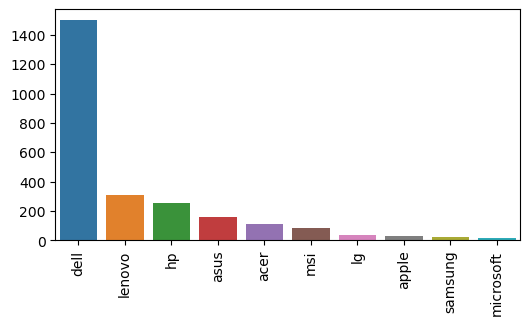

In [87]:
fig = plt.figure(figsize=(6,3))
sns.barplot(y=df['brand'].value_counts().sort_values(ascending=False).head(10).values , x=df['brand'].value_counts().sort_values(ascending=False).head(10).index)
plt.xticks(rotation=90)
plt.show()

In [88]:
brand_avg_price = df.groupby('brand')['price'].mean()

In [89]:
brand_avg_price_des = brand_avg_price.sort_values(ascending=False)

In [90]:
brand_avg_price_des.index[0:10]

Index(['best notebooks', 'mytrix', 'razer', 'jtd', 'gizpro', 'elo',
       'computer upgrade king', 'maingear', 'vaio', 'apple'],
      dtype='object', name='brand')

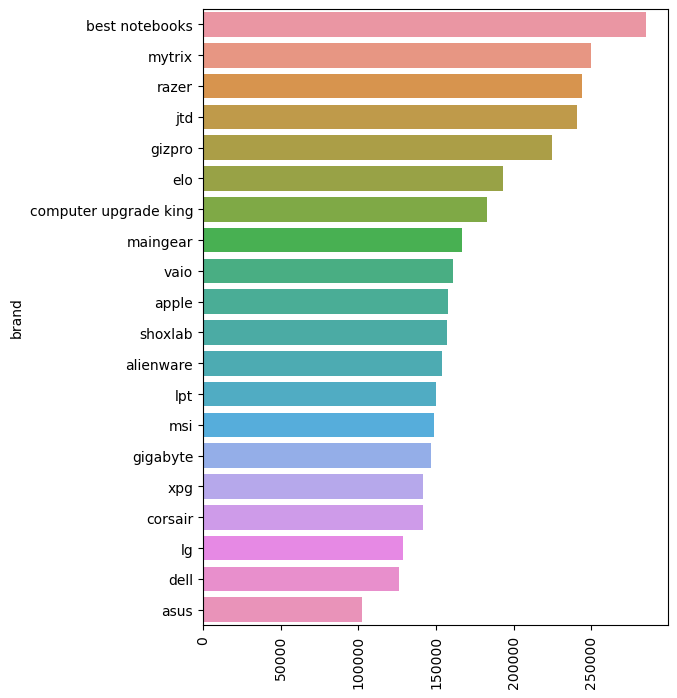

In [91]:
fig = plt.figure(figsize=(6,8))
sns.barplot(x=brand_avg_price_des.values[0:20] , y=brand_avg_price_des.index[0:20])
plt.xticks(rotation=90)
plt.show()

In [92]:
df.sample(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
767,dell,Precision 7000,16.0,NaN,1000.0,Core i9,64.0,Windows 11 Pro,Anti-glare Screen,RTX 3500 Ada,NVIDIA RTX 3500 Ada,NaN,NaN,285053.41125
327,asus,ASUS Chromebook,12.0,Mineral Gray,32.0,MediaTek MT8183,4.0,Chrome OS,NaN,Integrated,Mali-G72 MP3,NaN,4.2,23224.25250


**model**

In [93]:
df['model'].nunique()

1083

In [94]:
model_avg_price = df.groupby(['brand','model'])['price'].mean()

In [95]:
model_avg_price_df = model_avg_price.reset_index()

In [96]:
model_avg_price_df.head(5)

,brand,model,price
0,acer,"2023 Newest Acer 15.6"" Chromebook",18648.0000
1,acer,A115-32-C96U,19146.6675
2,acer,A315-24P-R7VH,24974.1675
3,acer,A3SP14-31PT-37NV,35517.7800
4,acer,A514-55-545G,55656.7875


In [97]:
model_and_price = model_avg_price_df[['model','price']][0:83].sort_values(by='price')

In [98]:
model_and_price.head(5)

,model,price
52,Chromebook,7824.6675
17,Acer 315,10821.6675
36,CB3-111,13315.8375
61,NX.HR4AA.001,14478.8400
37,CB314-1H-C884,16983.0000


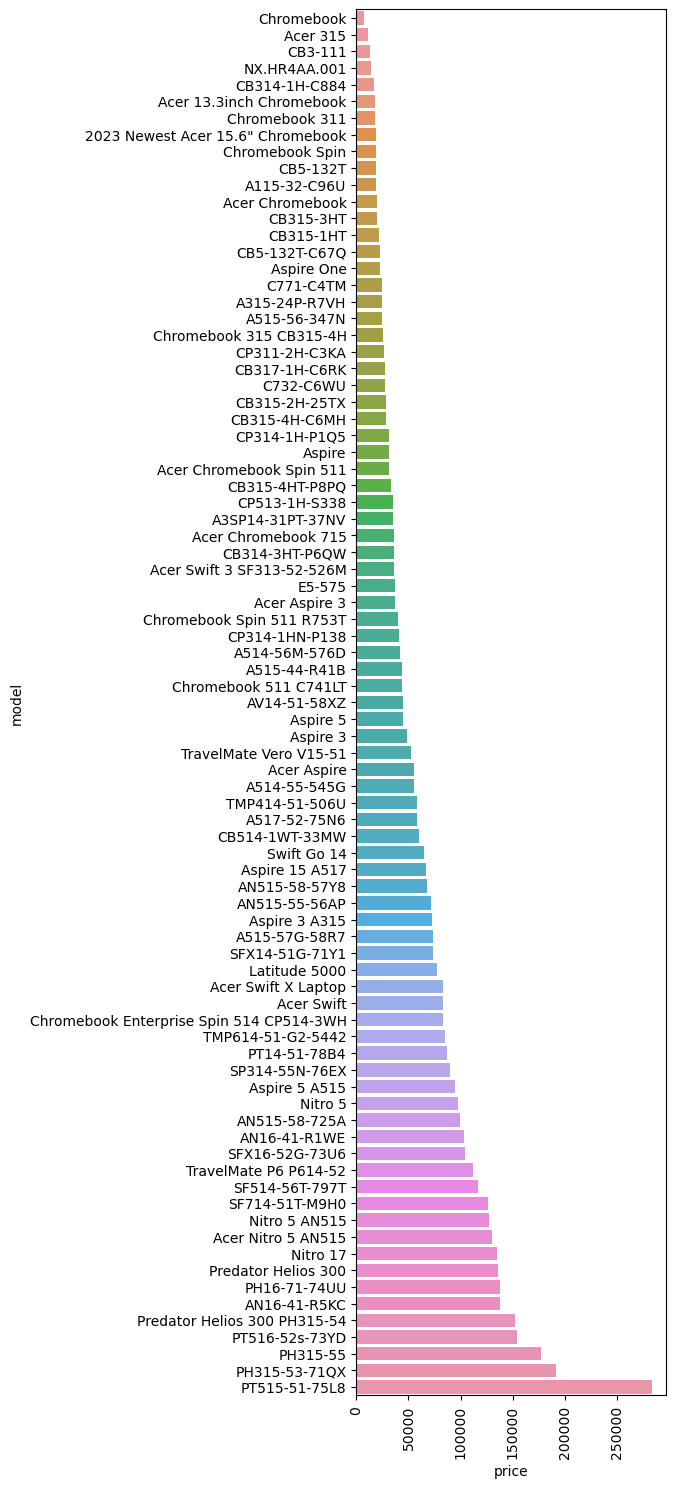

In [99]:
fig = plt.figure(figsize=(4,18))
sns.barplot(x=model_and_price['price'] , y=model_and_price['model'])
plt.xticks(rotation=90)
plt.show()

In [100]:
df.sample(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
177,msi,Vector GP68HX 13VH-098US,16.0,Cosmo Gray,1000.0,Core i9,16.0,Windows 11 Home,NaN,Dedicated,NVIDIA GeForce RTX 4080,NaN,5.0,174079.9125
3196,dell,Latitude 5530 Laptop,15.6,Black,2000.0,Core i5,32.0,Windows 11 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,85968.1125


**color**

In [101]:
df['color'].isnull().sum()

558

In [102]:
def convert_color(colorv):
    if pd.notna(colorv):
        if '/' in colorv:
            return colorv.split('/')[0]
        elif ',' in colorv:
            return colorv.split(',')[0]
    return colorv

df['color'] = df['color'].apply(convert_color)


In [103]:
def gray_tp_grey(color_value):
    if pd.notna(color_value):
        if 'Gray' in color_value:
            return color_value.replace('Gray','Grey')
    return color_value
    
df['color'] = df['color'].apply(gray_tp_grey)

In [104]:
df['color'].unique()

array(['Blue', 'Silver', 'Core Black', 'Midnight', 'Space Grey',
       'Eclipse Grey', 'Black', 'Grey', nan, 'Graphite Black', 'Almond',
       'Onyx Grey', 'Mineral Silver', 'Arctic Grey', 'Star Black',
       'Natural silver', 'Touchscreen', 'Off Black', 'Acronym',
       'Platinum', 'Mecha Grey', 'Pale rose gold', 'Abyss Blue',
       'Midnight Black', 'Rose Gold', 'Basalt Grey', 'Graphite',
       'Indie Black', 'Tech Black', 'Platinum Grey', 'Dale Grey',
       'Slate Grey', 'Quiet Blue', 'White', 'Shadow Grey',
       'Chalkboard Grey', 'Mercury', 'Green', 'Natural Silver',
       'Dynamic White', 'Cosmo Grey', 'Mineral Black', 'Ash Grey', 'Gold',
       'Celestial Blue', 'Dark Grey', 'Pebble Green', 'Fiesta Red',
       'Neptune Blue', 'Sky', 'Graphite Grey',
       'Black with illuminated Razer Logo', 'Light Titan', 'Lunar Light',
       'Dark Side of the Moon', 'Mica Silver', 'Mercury Grey',
       'Horizon Blue', 'Modern Grey', 'Transparent Silver', 'Storm Grey',
       'AI 

In [105]:
df['color'].value_counts()

Black              946
Silver             334
Grey               139
Platinum Silver    123
Natural Silver      25
                  ... 
Indigo Blue          1
Platinum Titan       1
Gary                 1
Dark Silver          1
Abyssal Black        1
Name: color, Length: 168, dtype: int64

In [106]:
df['color'].replace('Touchscreen', np.nan , inplace=True)

In [107]:
df['color'].replace('Evo i7-1260P', np.nan , inplace=True)

In [108]:
df['color'].replace('Information not Available', np.nan , inplace=True)

In [109]:
df['color'].replace('Machined Aluminum', np.nan , inplace=True)

In [110]:
df['color'].replace('Dune' , np.nan , inplace=True)

In [111]:
df['color'].replace('Dark Side of the Moon with High Endurance Clear Coat and Silky Smooth Finish' , np.nan , inplace=True)

In [112]:
df['color'].replace('Acronym' , np.nan , inplace=True)

In [113]:
df['color'].replace('Ice Blue + Iron Grey', 'Blue' , inplace=True)

In [114]:
df['color'].replace('Sky' , 'sky blue' , inplace=True)

In [115]:
df['color'].replace('Cover: RED ; Inner/keyboard: BLACK','Red' , inplace=True)

In [116]:
df['color'].replace('Black with illuminated Razer Logo','Black' , inplace=True)

In [117]:
df['color'].replace('Dark Side of the Moon','Dark' , inplace=True)

In [118]:
df['color'].replace('Black and silver','Black' , inplace=True)

In [119]:
df['color'].replace('Titanium Blue-Black-Dark Blue-Black','Blue' , inplace=True)

In [120]:
df['color'].replace('nan Display Back and Base In Silver','Silver' , inplace=True)

In [121]:
df['color'].replace('Phantom Grey with speckles','Phantom Grey' , inplace=True)

In [122]:
df['color'].replace('Machined Aluminum Display Back and Base In Silver' , 'Silver' , inplace=True)

In [123]:
df['color'].replace('Midnight' , 'Black' , inplace=True)

In [124]:
df['color'].unique()

array(['Blue', 'Silver', 'Core Black', 'Black', 'Space Grey',
       'Eclipse Grey', 'Grey', nan, 'Graphite Black', 'Almond',
       'Onyx Grey', 'Mineral Silver', 'Arctic Grey', 'Star Black',
       'Natural silver', 'Off Black', 'Platinum', 'Mecha Grey',
       'Pale rose gold', 'Abyss Blue', 'Midnight Black', 'Rose Gold',
       'Basalt Grey', 'Graphite', 'Indie Black', 'Tech Black',
       'Platinum Grey', 'Dale Grey', 'Slate Grey', 'Quiet Blue', 'White',
       'Shadow Grey', 'Chalkboard Grey', 'Mercury', 'Green',
       'Natural Silver', 'Dynamic White', 'Cosmo Grey', 'Mineral Black',
       'Ash Grey', 'Gold', 'Celestial Blue', 'Dark Grey', 'Pebble Green',
       'Fiesta Red', 'Neptune Blue', 'sky blue', 'Graphite Grey',
       'Light Titan', 'Lunar Light', 'Dark', 'Mica Silver',
       'Mercury Grey', 'Horizon Blue', 'Modern Grey',
       'Transparent Silver', 'Storm Grey', 'AI Blue', 'Ink Black',
       'Ice Blue', 'Mineral Grey', 'Pure Silver', 'RGB Backlit',
       'Classic 

In [125]:
df['color']=df['color'].str.lower()

In [126]:
df['color'].unique()

array(['blue', 'silver', 'core black', 'black', 'space grey',
       'eclipse grey', 'grey', nan, 'graphite black', 'almond',
       'onyx grey', 'mineral silver', 'arctic grey', 'star black',
       'natural silver', 'off black', 'platinum', 'mecha grey',
       'pale rose gold', 'abyss blue', 'midnight black', 'rose gold',
       'basalt grey', 'graphite', 'indie black', 'tech black',
       'platinum grey', 'dale grey', 'slate grey', 'quiet blue', 'white',
       'shadow grey', 'chalkboard grey', 'mercury', 'green',
       'dynamic white', 'cosmo grey', 'mineral black', 'ash grey', 'gold',
       'celestial blue', 'dark grey', 'pebble green', 'fiesta red',
       'neptune blue', 'sky blue', 'graphite grey', 'light titan',
       'lunar light', 'dark', 'mica silver', 'mercury grey',
       'horizon blue', 'modern grey', 'transparent silver', 'storm grey',
       'ai blue', 'ink black', 'ice blue', 'mineral grey', 'pure silver',
       'rgb backlit', 'classic black', 'platinum silver'

In [127]:
df['color'].isnull().sum()

567

In [128]:
color_price = df.groupby(['brand','color'])['price'].mean()

In [129]:
color_price_df=color_price.reset_index()

In [130]:
color_price_df.head()

,brand,color,price
0,acer,abyss black,164834.16750
1,acer,abyssal black,135614.25000
2,acer,black,72118.06337
3,acer,blue,25613.25000
4,acer,galaxy black,112186.86750


In [131]:
# color_price_df[['brand','color','price']][0:18]

In [132]:
color_and_price = color_price_df[['color','price']][0:18].sort_values(by='price')

In [133]:
color_and_price.head()

,color,price
7,moonstone white,13315.837500
17,white,19064.250000
10,platinum grey,21553.425000
3,blue,25613.250000
15,silver,35863.236667


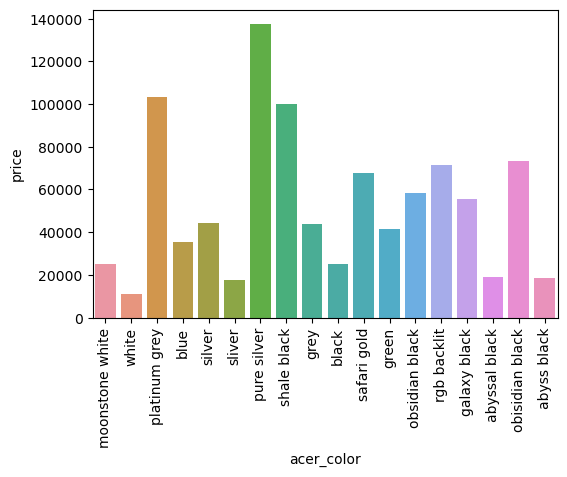

In [134]:
fig = plt.figure(figsize=(6,4))
sns.barplot(y=model_and_price['price'] , x=color_and_price['color'])
plt.xticks(rotation=90)
plt.xlabel('acer_color')
plt.show()

In [135]:
df.sample(1)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
2290,hp,HP Omen,15.6,black,512.0,Corei7-10750H,16.0,Windows 10,Anti-glare,Dedicated,NaN,NaN,4.5,166416.75


**OS**

In [136]:
df['OS'].unique()

array(['Windows 11', 'Windows 11 Pro', 'Windows 11 Home', 'Mac OS',
       'Windows 11 S', 'Chrome OS', 'Windows 10 S', 'Windows 10 Pro',
       'macOS 12 Monterey', nan, 'Windows 10 Home', 'Windows 10',
       'Windows 11 Home S', 'Windows', 'macOS 10.14 Mojave',
       'macOS 10.12 Sierra', 'Windows 7 Professional',
       'Windows 7 Pro + 10 Pro', 'PC', 'Mac OS X 10.0 Cheetah',
       'Windows 7',
       'Windows 10 Pro 64 Bit-Multi-Language Supports English/Spanish/French',
       'Windows 10 S, Windows 10', 'Windows 11 Pro, Windows',
       'Windows 10 Professional 64-bit',
       'Windows 10 Pro 64 Bit-Multi-Language Support English/French/Spanish.',
       'Windows 7 Home Premium',
       'Windows 10 Pro 64 Bit Multi-Language Support English/French/Spanish',
       'Windows 11 Home in S Mode', 'Windows 8', 'No',
       'Win 10 Multi-language /Free upgrade to Win 11',
       'Windows 10 64 Bit-Multi-Language Supports English/Spanish/French',
       'Windows 10 Pro (English/French

In [137]:
df['OS'] = df['OS'].str.lower()

In [138]:
df['OS'].isnull().sum()

26

In [139]:
def determine_os(osv):
    if pd.notna(osv):
        if 'win' in osv:
            return "Windows"
        elif 'mac' in osv:
            return "Mac"
        elif 'linux' in osv:
            return "Linux"
        elif 'chrome' in osv:
            return "Chrome"
        elif osv=='pc' or osv=='no' or osv=='hp thinpro' or osv=='unknown':
            return "Others"
    else:
        return osv

df['OS'] = df['OS'].apply(determine_os)

In [140]:
df['OS'].value_counts()

Windows    2447
Chrome      120
Mac          30
Others        4
Linux         1
Name: OS, dtype: int64

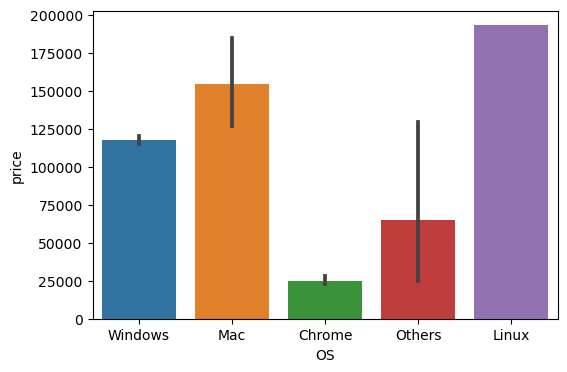

In [141]:
fig = plt.figure(figsize=(6,4))
sns.barplot(x=df['OS'] , y=df['price'])
plt.show()

**special_features**

In [142]:
df['special_features'] = df['special_features'].str.lower()

In [143]:
df.groupby(['special_features'])['special_features'].count()[60:120]

special_features
backlit keyboard,stylus                                                                               1
backlit keyboard,stylus pen                                                                           1
backlit kyb                                                                                           1
bezel,fingerprint                                                                                     1
bezel,fingerprint reader                                                                              1
bezels,dolby,stereo speakers                                                                          1
built for entertainment, multitasking & privacy                                                       1
chiclet keyboard, 1.5mm key-travel , camera                                                           1
chiclet,fingerprint reader                                                                            1
corning gorilla glass                          

**FingerPrint**

In [144]:
def finger_print(val):
    if pd.notna(val):
        if 'fingerprint' in val:
            return "Yes"
    else:
        return "No"

df['fingerprint_reader'] = df['special_features'].apply(finger_print)

In [145]:
df['fingerprint_reader'].unique()

array(['No', None, 'Yes'], dtype=object)

In [146]:
df.head(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,fingerprint_reader
0,rokc,NaN,14.0,blue,1000.0,Intel Core i7,8.0,Windows,NaN,Integrated,Intel,1.2,NaN,49116.6675,No
1,hp,NaN,15.6,silver,1000.0,Intel Core i5,64.0,Windows,backlit keyboard,Integrated,Intel,NaN,4.5,83249.1675,None


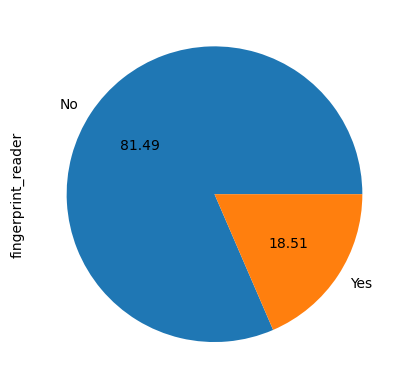

In [147]:
df['fingerprint_reader'].value_counts().plot(kind = 'pie' , autopct='%.2f' , )
plt.show()

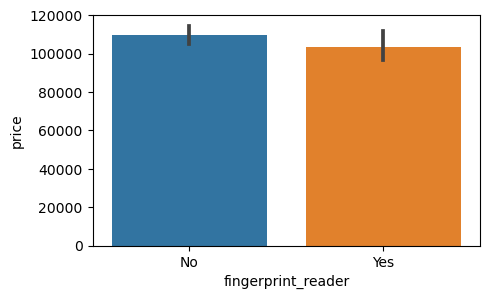

In [148]:
fig = plt.figure(figsize=(5,3))
sns.barplot(x=df['fingerprint_reader'] , y=df['price'])
plt.show()

In [149]:
df['fingerprint_reader'].isnull().sum()

1515

**Anti-Glare**

In [150]:
def anti_glare_scr(antival):
    if pd.notna(antival):
        if 'anti' in antival:
            return "Yes"
    else:
        return "No"

df['anti_glare'] = df['special_features'].apply(anti_glare_scr)

In [151]:
df.sample(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,fingerprint_reader,anti_glare
2420,dell,Dell XPS,13.3,NaN,NaN,8032,16.0,Windows,NaN,Integrated,NaN,NaN,5.0,106211.1825,No,No
2807,lenovo,Lenovo Thinkpad,15.6,NaN,256.0,Core i7-4700MQ,16.0,Windows,"backlit keyboard,fingerprint reader",Dedicated,NVIDIA Quadro K1100M,NaN,2.5,35131.5000,Yes,None


In [152]:
df['anti_glare'].unique()

array(['No', None, 'Yes'], dtype=object)

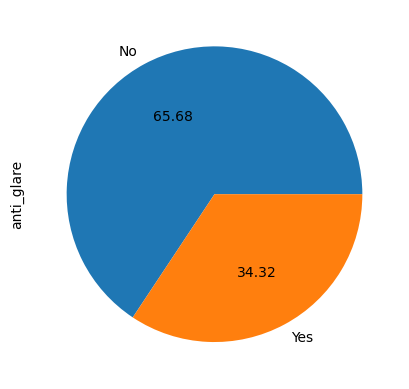

In [153]:
df['anti_glare'].value_counts().plot(kind = 'pie' , autopct='%.2f' , )
plt.show()

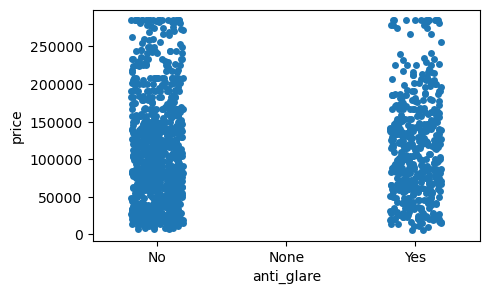

In [154]:
fig = plt.figure(figsize=(5,3))
sns.stripplot(x=df['anti_glare'] , y=df['price'])
plt.show()

In [155]:
df['anti_glare'].isnull().sum()

1247

**backlit_keyboard**

In [156]:
def keyboard(key):
    if pd.notna(key):
        if 'backlit' in key:
            return "Yes"
    else:
        return "No"

df['backlit_keyboard'] = df['special_features'].apply(keyboard)

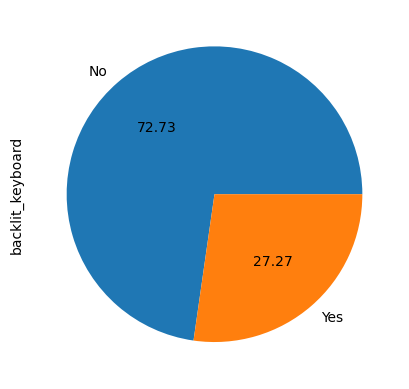

In [157]:
df['backlit_keyboard'].value_counts().plot(kind = 'pie' , autopct='%.2f' , )
plt.show()

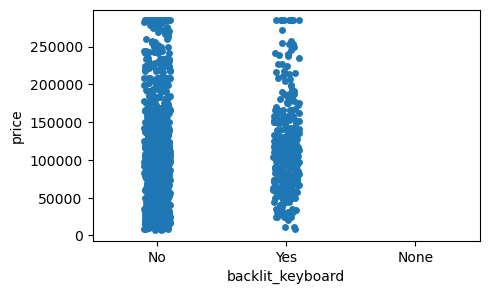

In [158]:
fig = plt.figure(figsize=(5,3))
sns.stripplot(x=df['backlit_keyboard'] , y=df['price'])
plt.show()

In [159]:
df['backlit_keyboard'].isnull().sum()

1381

In [160]:
df.sample(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,fingerprint_reader,anti_glare,backlit_keyboard
2796,apple,NaN,NaN,NaN,2000.0,NaN,32.0,Mac,NaN,Dedicated,NaN,NaN,NaN,285053.41125,No,No,No
62,lenovo,Chromebook,11.6,black,32.0,MediaTek MT8183,4.0,Chrome,anti-glare,Integrated,NaN,NaN,4.3,9552.10500,None,Yes,None


In [161]:
df.corr()['price']

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


screen_size    0.465102
harddisk       0.461649
ram            0.570758
cpu_speed     -0.062234
rating        -0.032321
price          1.000000
Name: price, dtype: float64

**hd audio**

In [162]:
df.groupby(['special_features'])['special_features'].count()[60:120]

special_features
backlit keyboard,stylus                                                                               1
backlit keyboard,stylus pen                                                                           1
backlit kyb                                                                                           1
bezel,fingerprint                                                                                     1
bezel,fingerprint reader                                                                              1
bezels,dolby,stereo speakers                                                                          1
built for entertainment, multitasking & privacy                                                       1
chiclet keyboard, 1.5mm key-travel , camera                                                           1
chiclet,fingerprint reader                                                                            1
corning gorilla glass                          

In [163]:
def hd(hd_val):
    if pd.notna(hd_val):
        if 'hd' in hd_val:
            return 'Yes'
    else:
        return 'No'
df['hd audio'] = df['special_features'].apply(hd)

In [164]:
df.sample()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,fingerprint_reader,anti_glare,backlit_keyboard,hd audio
2843,hp,ZBook Fury 15 G8,15.6,NaN,1000.0,Core i9,64.0,Windows,"anti-glare screen, miracast technology","RTX A5000,UHD Graphics",NVIDIA Intel RTX A5000 UHD Graphics,NaN,1.0,285053.41125,None,Yes,None,None


In [165]:
df['hd audio'].value_counts()

No     907
Yes    149
Name: hd audio, dtype: int64

In [166]:
df['hd audio'].isnull().sum()

1572

<Axes: xlabel='hd audio', ylabel='price'>

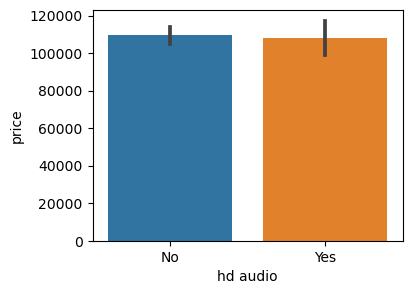

In [167]:
fig = plt.figure(figsize=(4,3))
sns.barplot(x=df['hd audio'] , y=df['price'])

**cpu**

In [168]:
df.groupby('cpu')['cpu'].count()

cpu
1.2GHz Cortex A13 Processor     1
1.2GHz Cortex A8 Processor      6
68000                           1
8032                           18
A-Series                        2
                               ..
Ryzen 9                        10
Ryzen 9 7900X                   1
Snapdragon                      3
Unknown                        10
core_m                          1
Name: cpu, Length: 141, dtype: int64

In [169]:
df['cpu'] = df['cpu'].str.lower()

In [170]:
df['cpu'].replace('core_m' , 'core m' , inplace=True)

In [171]:
df['cpu'].replace('mediatek_mt8127' , 'mediatek mt8127' , inplace=True)

In [172]:
df['cpu'].replace('unknown' , np.nan , inplace=True)

ARM - 1.2GHz Cortex A13 Processor, 1.2GHz Cortex A8 Processor

MOTOROLA - 68000,

INTEL - 8032 , Atom Z8350 , Celeron , Core , Pentium

AMD - A-Series Dual-Core A4-3300M , A10-7700K , Athlon , Athlon Silver 3050U, Ryzen 

APPLE - A-Series

MediaTek - MediaTek_MT8127 , MediaTek MT8183

QUALCOMM - Snapdragon

Unknown

Others

In [173]:
df.groupby('cpu')['cpu'].count().index[0:100]

Index(['1.2ghz cortex a13 processor', '1.2ghz cortex a8 processor', '68000',
       '8032', 'a-series', 'a-series dual-core a4-3300m', 'a10-7700k',
       'amd a series', 'amd a4', 'amd kabini a6-5200m quad core',
       'amd r series', 'amd ryzen 3 2300x', 'amd ryzen 5 5500u', 'amd ryzen 7',
       'amd ryzen 7 5800h', 'amd ryzen 9 5900x', 'apple m1', 'apple m2',
       'apple m2 max', 'arm 7100', 'athlon', 'athlon silver 3050u',
       'atom z8350', 'celeron', 'celeron 3205u', 'celeron n', 'celeron n2840',
       'celeron n3350', 'celeron n3450', 'celeron n4000', 'celeron n4020',
       'celeron p4500', 'core 2 duo', 'core 2 duo p8700', 'core i3',
       'core i3 1115g4', 'core i3 8130u', 'core i3 family', 'core i3-1005g1',
       'core i3-10110u', 'core i3-1115g4e', 'core i3-520m', 'core i5',
       'core i5 2.3 ghz', 'core i5 4310m', 'core i5 4310u', 'core i5 5300u',
       'core i5 6200u', 'core i5 7200u', 'core i5 8250u', 'core i5 8400t',
       'core i5 family', 'core i5-10210u'

**cpu brand**

In [174]:
def cpu_brand(a):
    if pd.notna(a):
        if a=='8032' or a=='atom z8350' or a.split()[0]=='celeron' or a.split()[0]=='core' or a.split()[0]=='pentium' or a.split()[0]=='intel':
            return 'intel'
        elif 'cortex' in a:
            return 'arm'
        elif a=='a-series dual-core a4-3300m' or a=='a10-7700k' or a=='athlon' or a=='athlon silver 3050u' or a.split()[0]=='ryzen' or a.split()[0]=='amd':
            return 'amd'
        elif a=='a-series' or a.split()[0]=='apple':
            return 'apple'
        elif a.split()[0]=='mediatek':
            return 'mediatek'
        elif a=='others' or a=='68000' or a=='snapdragon':
            return 'other_brand'
    else:
        return a
    
df['cpu brand'] = df['cpu'].apply(cpu_brand)

In [175]:
df.head(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,fingerprint_reader,anti_glare,backlit_keyboard,hd audio,cpu brand
0,rokc,NaN,14.0,blue,1000.0,intel core i7,8.0,Windows,NaN,Integrated,Intel,1.2,NaN,49116.6675,No,No,No,No,intel
1,hp,NaN,15.6,silver,1000.0,intel core i5,64.0,Windows,backlit keyboard,Integrated,Intel,NaN,4.5,83249.1675,None,None,Yes,None,intel


In [176]:
df['cpu brand'].value_counts()

intel          2249
amd             216
mediatek         13
apple            12
other_brand       8
arm               8
Name: cpu brand, dtype: int64

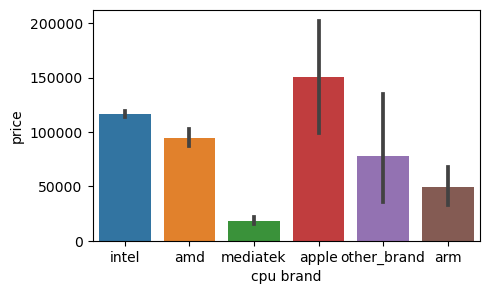

In [177]:
fig = plt.figure(figsize=(5,3))
sns.barplot(x=df['cpu brand'] , y=df['price'])
plt.show()

**graphics**

In [178]:
df['graphics'].value_counts().sort_values(ascending=False)

Integrated                   1639
Dedicated                     447
Iris Xe Graphics               85
Nvidia GeForce RTX 4070        27
UHD Graphics                   24
                             ... 
RTX A2000,UHD Graphics          1
RTX 4050                        1
NVIDIA® GeForce RTX™ 4060       1
RTX 3070Ti                      1
Shared, Integrated              1
Name: graphics, Length: 109, dtype: int64

In [179]:
df['graphics']=df['graphics'].str.lower()

In [180]:
def grap(grap_val):
    if pd.notna(grap_val):
        if grap_val.split()[0]=='intel' or grap_val.split()[0]=='iris' or grap_val.split()[0]=='uhd':
            return 'intel'
        elif grap_val.split()[0]=='amd' or grap_val.split()[0]=='radeon':
            return 'amd'
        elif grap_val.split()[0]=='nvidia' or grap_val.split()[0]=='geforce'or grap_val.split()[0]=='rtx':
            return 'nvidia'
        elif grap_val.split()[0]=='integrated':
            return 'integated'
        elif grap_val.split()[0]=='dedicated':
            return 'dedicated'
        else:
            return 'others'
    else:
        return grap_val
    
df['new_graphics'] = df['graphics'].apply(grap)    

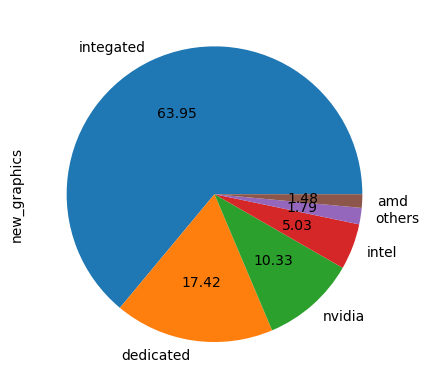

In [181]:
df['new_graphics'].value_counts().plot(kind='pie' , autopct='%.2f')
plt.show()

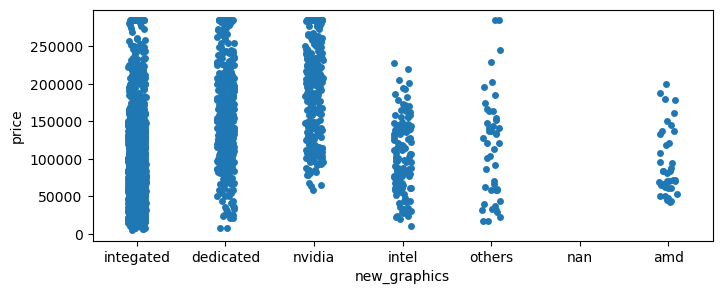

In [182]:
fig = plt.figure(figsize=(8,3))
sns.stripplot(x=df['new_graphics'] , y=df['price'])
plt.show()

In [183]:
df.sample(2)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price,fingerprint_reader,anti_glare,backlit_keyboard,hd audio,cpu brand,new_graphics
2085,dell,Latitude Rugged 5430 Laptop,14.0,silver,512.0,core i7,16.0,Windows,NaN,integrated,Intel Integrated Graphics,NaN,NaN,137111.9175,No,No,No,No,intel,integated
3504,dell,Latitude 5521 Laptop,15.6,black,512.0,core i5,32.0,Windows,wifi & bluetooth,integrated,NaN,NaN,NaN,141857.1675,None,None,None,None,intel,integated


In [184]:
df.drop(['special_features','graphics','graphics_coprocessor','cpu_speed','rating','cpu']  , axis=1 , inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               2628 non-null   object 
 1   model               2497 non-null   object 
 2   screen_size         2600 non-null   float64
 3   color               2061 non-null   object 
 4   harddisk            2448 non-null   float64
 5   ram                 2570 non-null   float64
 6   OS                  2602 non-null   object 
 7   price               2623 non-null   float64
 8   fingerprint_reader  1113 non-null   object 
 9   anti_glare          1381 non-null   object 
 10  backlit_keyboard    1247 non-null   object 
 11  hd audio            1056 non-null   object 
 12  cpu brand           2506 non-null   object 
 13  new_graphics        2566 non-null   object 
dtypes: float64(4), object(10)
memory usage: 372.5+ KB


In [186]:
df.isnull().sum()

brand                    0
model                  131
screen_size             28
color                  567
harddisk               180
ram                     58
OS                      26
price                    5
fingerprint_reader    1515
anti_glare            1247
backlit_keyboard      1381
hd audio              1572
cpu brand              122
new_graphics            62
dtype: int64

In [187]:
df.sample(5)

,brand,model,screen_size,color,harddisk,ram,OS,price,fingerprint_reader,anti_glare,backlit_keyboard,hd audio,cpu brand,new_graphics
3845,dell,Latitude 3540 Laptop,15.6,black,256.0,16.0,Windows,72010.4175,None,None,None,None,intel,integated
1034,hp,Laptop,15.6,NaN,2000.0,32.0,Windows,24866.7750,No,No,No,No,intel,integated
3473,dell,Inspiron 3511 Laptop,15.6,black,512.0,64.0,Windows,64646.9550,None,None,None,None,intel,integated
458,hp,HP Pavilion,11.6,dark ash silver,128.0,4.0,Windows,30719.2500,No,No,No,No,intel,integated
2071,dell,Precision 7750 Laptop,17.3,silver,256.0,16.0,Windows,149845.8375,None,None,None,None,intel,nvidia


In [188]:
df.columns

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'ram', 'OS',
       'price', 'fingerprint_reader', 'anti_glare', 'backlit_keyboard',
       'hd audio', 'cpu brand', 'new_graphics'],
      dtype='object')

C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\3564728520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


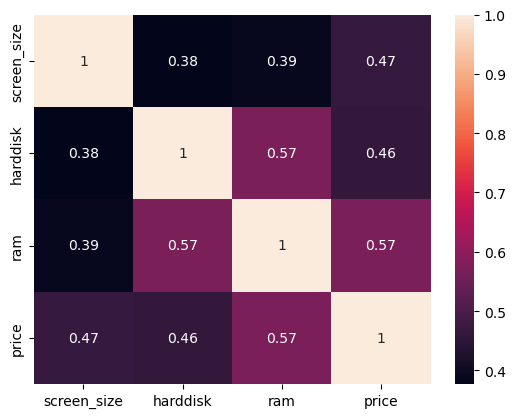

In [189]:
sns.heatmap(df.corr() , annot=True)
plt.show()

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               2628 non-null   object 
 1   model               2497 non-null   object 
 2   screen_size         2600 non-null   float64
 3   color               2061 non-null   object 
 4   harddisk            2448 non-null   float64
 5   ram                 2570 non-null   float64
 6   OS                  2602 non-null   object 
 7   price               2623 non-null   float64
 8   fingerprint_reader  1113 non-null   object 
 9   anti_glare          1381 non-null   object 
 10  backlit_keyboard    1247 non-null   object 
 11  hd audio            1056 non-null   object 
 12  cpu brand           2506 non-null   object 
 13  new_graphics        2566 non-null   object 
dtypes: float64(4), object(10)
memory usage: 372.5+ KB


C:\Users\ADC\AppData\Local\Temp\ipykernel_10856\2690725975.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


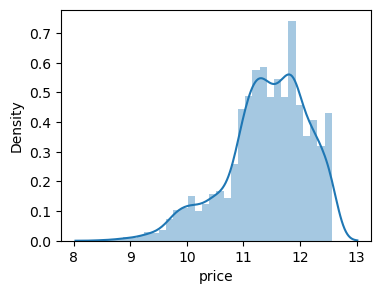

In [191]:
fig = plt.figure(figsize=(4,3))
sns.distplot(np.log(df['price']))
plt.show()

In [192]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [193]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [194]:
x = df.drop(columns=['price'])
y = np.log(df['price'])

In [195]:
x.head(2)

,brand,model,screen_size,color,harddisk,ram,OS,fingerprint_reader,anti_glare,backlit_keyboard,hd audio,cpu brand,new_graphics
0,rokc,NaN,14.0,blue,1000.0,8.0,Windows,No,No,No,No,intel,integated
1,hp,NaN,15.6,silver,1000.0,64.0,Windows,None,None,Yes,None,intel,integated


In [196]:
y.head(2)

0    10.801954
1    11.329593
Name: price, dtype: float64

In [197]:
y.isnull().sum()

5

In [198]:
y.fillna(np.mean(y) , inplace=True)

In [199]:
x.columns

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'ram', 'OS',
       'fingerprint_reader', 'anti_glare', 'backlit_keyboard', 'hd audio',
       'cpu brand', 'new_graphics'],
      dtype='object')

In [200]:
one_cat_columns = x.select_dtypes(include='object').columns[3:]
num_columns = x.select_dtypes(exclude='object').columns

In [201]:
one_cat_columns

Index(['OS', 'fingerprint_reader', 'anti_glare', 'backlit_keyboard',
       'hd audio', 'cpu brand', 'new_graphics'],
      dtype='object')

In [202]:
num_columns

Index(['screen_size', 'harddisk', 'ram'], dtype='object')

In [203]:
x.sample()

,brand,model,screen_size,color,harddisk,ram,OS,fingerprint_reader,anti_glare,backlit_keyboard,hd audio,cpu brand,new_graphics
953,asus,P1512CEA-XS51,15.6,NaN,256.0,8.0,Windows,No,No,No,No,intel,integated


In [204]:
label = LabelEncoder()

x['brand']=label.fit_transform(x['brand'])
x['color']=label.fit_transform(x['color'])
x['model']=label.fit_transform(x['model'])

In [205]:
num_pipeline=Pipeline(
steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale_fetures',MinMaxScaler())
]
,verbose=True)

In [206]:
one_cat_pipeline=Pipeline(
steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder',OneHotEncoder(drop='first',sparse=False)),
]
,verbose=True)

In [207]:
preprocessor=ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_columns),
    ('cat_pipeline',one_cat_pipeline,one_cat_columns),
    ('label_encoder_columns',MinMaxScaler(),['brand','color','model'])
])

In [208]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale_fetures',
                                                  MinMaxScaler())],
                                          verbose=True),
                                 Index(['screen_size', 'harddisk', 'ram'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))],
                                          verbose=True),
                                 Index(['OS', 'fingerprint_reader', 'anti_glare', 'backlit_keyboard',
       'hd audio', 'cpu brand', 'new_graphics'],
      dtype='object')),
                                ('label_encoder_columns', MinMaxScaler(),
                                 ['brand', 'color', 'model'])])

In [209]:
x = pd.DataFrame(preprocessor.fit_transform(x),columns=preprocessor.get_feature_names_out())

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing scale_fetures, total=   0.0s
[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] .... (step 2 of 2) Processing onehot_encoder, total=   0.0s


C:\Users\ADC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [210]:
x.head(1)

,num_pipeline__screen_size,num_pipeline__harddisk,num_pipeline__ram,cat_pipeline__OS_Linux,cat_pipeline__OS_Mac,cat_pipeline__OS_Others,cat_pipeline__OS_Windows,cat_pipeline__fingerprint_reader_Yes,cat_pipeline__fingerprint_reader_None,cat_pipeline__anti_glare_Yes,...,cat_pipeline__cpu brand_other_brand,cat_pipeline__cpu brand_None,cat_pipeline__new_graphics_dedicated,cat_pipeline__new_graphics_integated,cat_pipeline__new_graphics_intel,cat_pipeline__new_graphics_nvidia,cat_pipeline__new_graphics_others,label_encoder_columns__brand,label_encoder_columns__color,label_encoder_columns__model
0,0.375,0.472582,0.104478,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.804878,0.111888,1.0


In [211]:
# label = LabelEncoder()

# x['remainder__brand']=label.fit_transform(x['remainder__brand'])
# x['remainder__color']=label.fit_transform(x['remainder__color'])
# x['remainder__model']=label.fit_transform(x['remainder__model'])

In [212]:
# scaler = MinMaxScaler()

# x['remainder__brand']=scaler.fit_transform(x[['remainder__brand']])
# x['remainder__color']=scaler.fit_transform(x[['remainder__color']])
# x['remainder__model']=scaler.fit_transform(x[['remainder__model']])

In [213]:
x.head(1)

,num_pipeline__screen_size,num_pipeline__harddisk,num_pipeline__ram,cat_pipeline__OS_Linux,cat_pipeline__OS_Mac,cat_pipeline__OS_Others,cat_pipeline__OS_Windows,cat_pipeline__fingerprint_reader_Yes,cat_pipeline__fingerprint_reader_None,cat_pipeline__anti_glare_Yes,...,cat_pipeline__cpu brand_other_brand,cat_pipeline__cpu brand_None,cat_pipeline__new_graphics_dedicated,cat_pipeline__new_graphics_integated,cat_pipeline__new_graphics_intel,cat_pipeline__new_graphics_nvidia,cat_pipeline__new_graphics_others,label_encoder_columns__brand,label_encoder_columns__color,label_encoder_columns__model
0,0.375,0.472582,0.104478,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.804878,0.111888,1.0


In [214]:
# plt.figure(figsize = (22,22))
# sns.heatmap(pd.concat([x_train_upd,y_train] , axis=1).corr(), annot = True, cmap = "RdYlGn")

# plt.show()

In [215]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x , y)

ExtraTreesRegressor()

In [216]:
print(selection.feature_importances_)

[0.06448761 0.13639028 0.32880608 0.00161498 0.01665869 0.00043706
 0.04817936 0.00452679 0.00730301 0.00772013 0.00947445 0.00748712
 0.00850943 0.00388703 0.01083431 0.00081467 0.00165749 0.0093357
 0.00127357 0.00093067 0.00162277 0.00460998 0.12109238 0.00319899
 0.00663654 0.00148665 0.04714919 0.03926359 0.10461149]


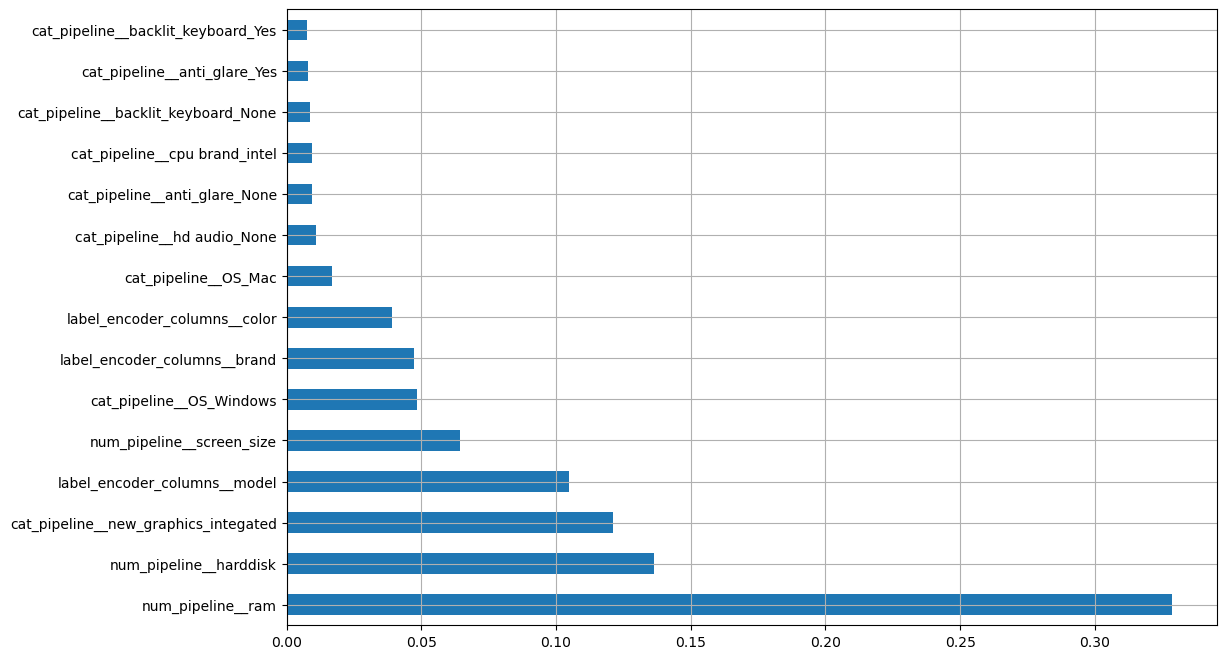

In [217]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.grid()
plt.show()


In [218]:
mask = feat_importances.nlargest(14)
mask.index

Index(['num_pipeline__ram', 'num_pipeline__harddisk',
       'cat_pipeline__new_graphics_integated', 'label_encoder_columns__model',
       'num_pipeline__screen_size', 'cat_pipeline__OS_Windows',
       'label_encoder_columns__brand', 'label_encoder_columns__color',
       'cat_pipeline__OS_Mac', 'cat_pipeline__hd audio_None',
       'cat_pipeline__anti_glare_None', 'cat_pipeline__cpu brand_intel',
       'cat_pipeline__backlit_keyboard_None', 'cat_pipeline__anti_glare_Yes'],
      dtype='object')

In [219]:
X = ['num_pipeline__ram', 'num_pipeline__harddisk',
       'cat_pipeline__new_graphics_integated', 'label_encoder_columns__model',
       'num_pipeline__screen_size', 'cat_pipeline__OS_Windows',
       'label_encoder_columns__brand', 'label_encoder_columns__color',
       'cat_pipeline__OS_Mac', 'cat_pipeline__hd audio_None',
       'cat_pipeline__anti_glare_None', 'cat_pipeline__cpu brand_intel',
       'cat_pipeline__backlit_keyboard_None', 'cat_pipeline__anti_glare_Yes']

In [220]:
X_filter = x.loc[:,X]

In [231]:
X_filter.head(2)

,num_pipeline__ram,num_pipeline__harddisk,cat_pipeline__new_graphics_integated,label_encoder_columns__model,num_pipeline__screen_size,cat_pipeline__OS_Windows,label_encoder_columns__brand,label_encoder_columns__color,cat_pipeline__OS_Mac,cat_pipeline__hd audio_None,cat_pipeline__anti_glare_None,cat_pipeline__cpu brand_intel,cat_pipeline__backlit_keyboard_None,cat_pipeline__anti_glare_Yes
0,0.104478,0.472582,1.0,1.0,0.375,1.0,0.804878,0.111888,0.0,0.0,0.0,1.0,0.0,0.0
1,0.940299,0.472582,1.0,1.0,0.625,1.0,0.390244,0.832168,0.0,1.0,1.0,1.0,0.0,0.0


In [232]:
y.shape

(2628,)

In [233]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_filter,y,test_size=0.15,random_state=42)

In [234]:
x_train

,num_pipeline__ram,num_pipeline__harddisk,cat_pipeline__new_graphics_integated,label_encoder_columns__model,num_pipeline__screen_size,cat_pipeline__OS_Windows,label_encoder_columns__brand,label_encoder_columns__color,cat_pipeline__OS_Mac,cat_pipeline__hd audio_None,cat_pipeline__anti_glare_None,cat_pipeline__cpu brand_intel,cat_pipeline__backlit_keyboard_None,cat_pipeline__anti_glare_Yes
1999,0.223881,0.241955,1.0,0.512465,0.3750,1.0,0.243902,0.090909,0.0,1.0,1.0,1.0,1.0,0.0
1207,0.223881,0.120970,1.0,0.506002,0.3750,1.0,0.243902,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
2107,0.223881,0.060477,1.0,0.530009,0.3750,1.0,0.243902,0.090909,0.0,1.0,1.0,1.0,1.0,0.0
179,0.462687,0.472582,1.0,0.011080,0.3750,1.0,0.512195,0.293706,0.0,0.0,0.0,1.0,0.0,0.0
322,0.223881,0.472582,0.0,0.937211,0.6250,1.0,0.243902,0.090909,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.223881,0.241955,0.0,0.090489,0.6250,1.0,0.317073,0.090909,0.0,1.0,0.0,0.0,1.0,1.0
1095,0.462687,0.945179,0.0,0.587258,0.6875,1.0,0.487805,0.090909,0.0,1.0,0.0,1.0,1.0,1.0
1130,0.223881,0.241955,1.0,1.000000,0.6250,1.0,0.390244,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
1294,0.104478,0.241955,1.0,0.265928,0.0625,1.0,0.243902,1.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [240]:
y_train.head(1)

3442    11.116398
Name: price, dtype: float64

In [241]:
model = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])

In [242]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale_fetures',
                                                                   MinMaxScaler())],
                                                           verbose=True),
                                                  Index(['screen_size', 'harddisk', 'ram'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))],
                                                           verbose=True),
                                                  Index(['OS', 'fingerprint_reader', 'anti_glare', 'backlit_keyboard',
       'hd audio', 'cpu brand', 'new_graphics'],
      dtype='object')),
                                                 ('label_encoder_columns',
                                                  MinMaxScaler(),
                                                  ['brand', 'color',
                                                   'model'])])),
                ('model', RandomForestRegressor())])

In [237]:
model.fit(x_train,y_train)

ValueError: A given column is not a column of the dataframe

# Random Forest Regressor

In [ ]:
random_for = RandomForestRegressor()
random_for.fit(x_train,y_train)

In [ ]:
y_pred = random_for.predict(x_test)

In [ ]:
random_for.score(x_train, y_train)

In [ ]:
random_for.score(x_test, y_test)

In [ ]:
r2_score(y_test , y_pred)

In [ ]:
from sklearn.metrics import median_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test , y_pred)

In [ ]:
mean_squared_error(y_test , y_pred )

In [ ]:
fig = plt.figure(figsize=(6,3.5))
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


# Hyper Parameter Tuning RFR

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,120]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10 , 12 ,14]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = random_for, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10 , cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(x_train,y_train)

In [ ]:
rf_random.best_params_  

In [ ]:
y_prediction = rf_random.predict(x_test)

In [ ]:
plt.figure(figsize = (6,3))
plt.scatter(y_test, y_prediction, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_prediction")
plt.show()


In [ ]:
r2_score(y_test, y_prediction)

In [ ]:
mean_absolute_error(y_test , y_prediction)

In [ ]:
mean_squared_error(y_test , y_prediction)

# Gradient Boosting Regressor

In [ ]:
grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)
ypred2 = grad.predict(x_test)
r2_score(y_test , ypred2)

In [ ]:
mean_absolute_error(y_test , ypred2)

In [ ]:
mean_squared_error(y_test , ypred2)

# Hyper parameter tuning GBR

In [ ]:
param_grid = {
    'n_estimators': np.arange(10, 1000, 8),
    'learning_rate': [0.01, 0.02, 0.2, 0.3],
    'max_depth': np.arange(5, 20),
    'min_samples_split': np.arange(2, 6),
    'min_samples_leaf': np.arange(1, 8),
    'max_features': ['auto', 'sqrt'],
    'subsample': [0.8, 0.9, 1.0 ],
}



# Create the GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=42)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, n_iter=35, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42,verbose=2)


In [ ]:
random_search.fit(x_train ,  y_train)

In [ ]:
random_search.best_params_

In [ ]:
y_pr = random_search.predict(x_test)

In [ ]:
y_pr = random_search.predict(x_test)

In [ ]:
r2_score(y_test , y_pr)

In [ ]:
mean_absolute_error(y_test , y_pr)

In [ ]:
mean_squared_error(y_test , y_pr)

In [ ]:
import pickle
pickle.dump(preprocessor , open('preprocessor.pkl','wb'))